<a href="https://colab.research.google.com/github/fatihgumuss/machine-learning-and-nlp/blob/main/ML_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_url = 'https://raw.githubusercontent.com/mmazurek-wat/ml-class/master/mlclass-ex1/ex1data2.txt'
data2 = pd.read_csv(dataset_url, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
X = data2.drop(['Price'], axis=1)  ## Assign all but the price field to the independent variable X
y = data2['Price'] ## Assign the price field to the dependent variable y
m=len(y) ## m is the length of the training set

In [ ]:
def featureNormalize(X):
    '''
    This function takes the features as input and
    returns the normalized values, the mean, as well
    as the standard deviation for each feature.
    '''

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma


X, mean, std = featureNormalize(X) ## We call the function over the features

In [ ]:
X = np.append(np.ones([m,1]), X, axis=1) ## Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) ## reshape y to mx1 array.
theta = np.zeros([3,1]) ## Initialize theta (the coefficient) to a 3x1 zero vector.

In [ ]:
def computeCostMulti(X,y, theta):
    '''
    This function takes in the the values for
    the training set as well as initial values
    of theta and returns the cost(J).
    '''
    m = len(y)  # number of training examples
    h = X.dot(theta)  # hypothesis or predicted values
    J = 1/(2*m) * np.sum((h-y)**2)  # cost function
    return J

cost = computeCostMulti(X,y,theta) ## Call the function

print(cost)

65591548106.45744


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, iter):
    '''
    This function takes in the values of the training set,
    as well the intial theta values(coefficients), the
    learning rate, and the number of iterations. The output
    will be the a new set of coefficeients(theta), optimized
    for making predictions, as well as the array of the cost
    as it depreciates on each iteration.
    '''
    J_history = []  # array for storing the cost values on each iteration
    m = len(y)  # length of the training set
    for i in range(iter):  # loop for iter iterations
        h = X.dot(theta)  # hypothesis or predicted values
        theta = theta - alpha/m * X.T.dot(h-y)  # gradient descent step
        J_history.append(computeCostMulti(X, y, theta))  # append the cost to the J_history array
    return theta, J_history  # return the final values of theta and the J_history array


iter = 400  # initialize the iteration parameter
alpha = 0.01  # initialize the learning rate

# call the function and pass in the parameters to compute new coefficients
new_theta, J_history = gradientDescentMulti(X, y, theta, alpha, iter)

print(new_theta)


[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [ ]:
new_cost = computeCostMulti(X,y,new_theta) ## We call the function again, but use the new coefficients.
print(new_cost)

2105448288.6292474


Text(0.5, 1.0, 'Minimizing Cost Using Gradient Descent')

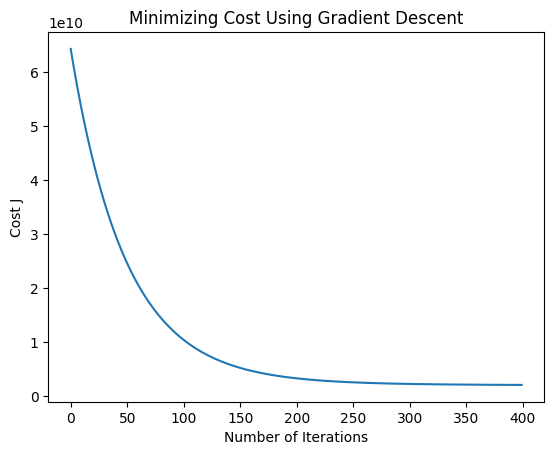

In [ ]:
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Number of Iterations')
plt.title('Minimizing Cost Using Gradient Descent')

In [ ]:
## Call the gradient descent algorithm with a different learning rate on each occassion.
## All other parameters remain constant
theta_1, J_history_1 = gradientDescentMulti(X, y, theta, 0.5, 50)
theta_2, J_history_2 = gradientDescentMulti(X, y, theta, 0.1, 50)
theta_3, J_history_3 = gradientDescentMulti(X, y, theta, 0.03, 50)
theta_4, J_history_4 = gradientDescentMulti(X, y, theta, 0.01, 50)
theta_5, J_history_5 = gradientDescentMulti(X, y, theta, 0.003, 50)
theta_6, J_history_6 = gradientDescentMulti(X, y, theta, 0.001, 50)

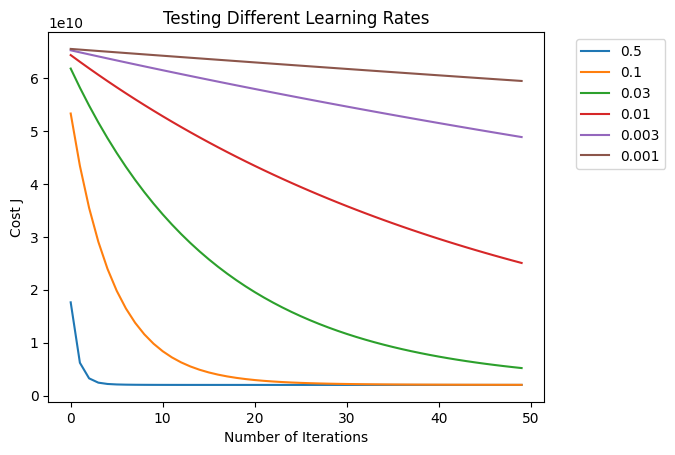

In [ ]:
## Plot the cost againt number of iterations for each learning rate
plt.plot(J_history_1, label='0.5')
plt.plot(J_history_2, label='0.1')
plt.plot(J_history_3, label='0.03')
plt.plot(J_history_4, label='0.01')
plt.plot(J_history_5, label='0.003')
plt.plot(J_history_6, label='0.001')
plt.title('Testing Different Learning Rates')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend(bbox_to_anchor=(1.05, 1.0))

In [ ]:
## Using the best learning rate (0.3), we run gradient descent again to find the coefficients.
#TODO: Replace None with learning rate value
theta, J_history = gradientDescentMulti(X, y, theta, 0.3, 1500)

In [ ]:
print(theta) ## Print the new theta values.

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


In [ ]:
## TO PREDICT THE PRICE OF A HOUSE WITH 1650 SQUARE FEET AND 3 BEDROOMS
#First normalize the features
X = np.array([1650, 3]) ## Convert X to a numpy array

X = (X - mean[0]) / np.std(X)  ## Normalize X by subtracting the mean of the distribution from X, and then divide by the standard deviation.

X = np.insert(X, 0, 1) ## Add the bias term

X = X.reshape(1, -1) ## Reshape X to a 1x3 array

print(X) ## Print X to see waht it currently looks like

[[ 1.         -0.42584196 -2.42584196]]


In [ ]:
def prediction(X, theta):
    '''
    This function takes in the features of the house
    as well as the coefficients, and returns the
    predicted price.
    '''
    return np.dot(X,theta)

In [ ]:
pred = prediction(X, theta) ## Call the function
print(pred)


[[309763.24501542]]
